In [7]:
import torch
import torch.nn as nn
import numpy as np
from scipy import signal, stats

%matplotlib notebook
import matplotlib.pyplot as plt

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


In [60]:
# 绘制SEEG数据用于调试
def seeg_plot(seeg):
    seq_len = seeg.shape[-1]
    x = np.linspace(0, seq_len - 1, seq_len)
    for index, channel in enumerate(seeg[0]):
        plt.subplot(6, 1, 0 + index + 1)
        plt.plot(x, channel)
        if index == 5:
            break
    plt.show()

    
def get_stft(x, fs, clip_fs=-1, normalizing=None, **kwargs):
    f, t, Zxx = signal.stft(x, fs, **kwargs)
   
    Zxx = Zxx[:clip_fs]
    f = f[:clip_fs]

    Zxx = np.abs(Zxx)
    clip = 5 #To handle boundary effects
    if normalizing=="zscore":
        Zxx = Zxx[:,clip:-clip]
        Zxx = stats.zscore(Zxx, axis=-1)
        t = t[clip:-clip]
    elif normalizing=="baselined":
        Zxx = baseline(Zxx[:,clip:-clip])
        t = t[clip:-clip]
    elif normalizing=="db":
        Zxx = np.log2(Zxx[:,clip:-clip])
        t = t[clip:-clip]

    if np.isnan(Zxx).any():
        import pdb; pdb.set_trace()

    return f, t, Zxx


def plot_stft(f, t, linear):
    plt.figure(figsize=(15,3))
    f[-1]=200
    g1 = plt.pcolormesh(t,f,linear, shading="gouraud", vmin=-3, vmax=5)

    cbar = plt.colorbar(g1)
    tick_font_size = 15
    cbar.ax.tick_params(labelsize=tick_font_size)
    cbar.ax.set_ylabel("Power (Arbitrary units)", fontsize=15)
    plt.xticks(fontsize=20)
    plt.ylabel("")
    plt.yticks(fontsize=20)
    plt.xlabel("Time (s)", fontsize=20)
    plt.ylabel("Frequency (Hz)", fontsize=20)

    
def test():
    # 模拟SEEG数据
    seeg_raw_data = torch.rand(1, 92, 5000) * 10 - 5
    seeg_plot(seeg_raw_data)
    
    
    # 进行短时傅里叶变换转为时频
#     f,t,linear = get_stft(seeg_raw_data, 500, clip_fs=-1, nperseg=400, noverlap=200, normalizing="zscore", return_onesided=True)
#     print(f.shape, t.shape, linear.shape)
    
#     plot_stft(f, t, linear)
    
    
#     # 计算均值和标准差
#     mean = torch.mean(seeg_raw_data)
#     std = torch.std(seeg_raw_data)

#     # 进行标准化
#     seeg_normalized_data = (seeg_raw_data - mean) / std
#     seeg_plot(seeg_normalized_data)

<IPython.core.display.Javascript object>


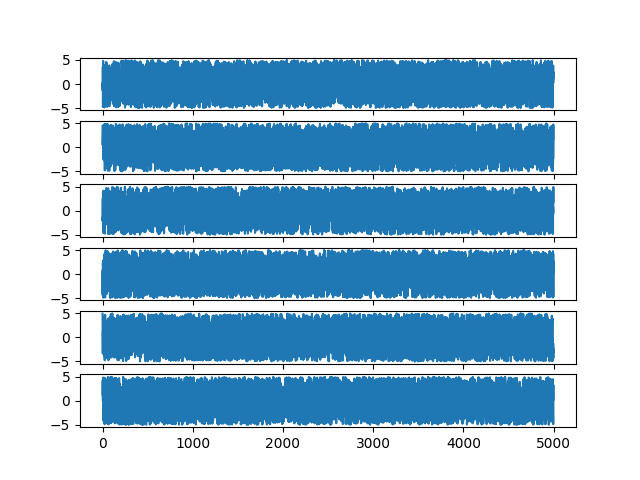

In [61]:
test()